# Data exploration and visualisation - Project 2

In [161]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

## Exercise 2.1

### Importing Breast Cancer Wisconsin (Diagnostic) Data Set

In [231]:
df_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                header=None)

#### Information from *.names* file
7. Attribute Information: (class attribute has been moved to last column)

    #### Attribute    $\rightarrow$      Domain
   -- -----------------------------------------
   1. Sample code number     $\rightarrow$       id number
   2. Clump Thickness       $\rightarrow$        1 - 10
   3. Uniformity of Cell Size   $\rightarrow$    1 - 10
   4. Uniformity of Cell Shape  $\rightarrow$    1 - 10
   5. Marginal Adhesion     $\rightarrow$        1 - 10
   6. Single Epithelial Cell Size  $\rightarrow$ 1 - 10
   7. Bare Nuclei         $\rightarrow$          1 - 10
   8. Bland Chromatin     $\rightarrow$          1 - 10
   9. Normal Nucleoli      $\rightarrow$         1 - 10
  10. Mitoses           $\rightarrow$            1 - 10
  11. Class:            $\rightarrow$            (2 for benign, 4 for malignant)

As the range of the explanatory variables is the same (1-10), I have decided not to standarize them before training the SVM model.

In [232]:
df_cancer.columns = ['Id','Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion',
                     'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']

First rows of the dataset:

In [4]:
df_cancer.head()

Id  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2                3                1        1      2  
3                3                7        1      2  
4                3                1        1      2

The basic information about the dataset:

In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df_cancer.describe()

Id  Clump_Thickness  Uniformity_Cell_Size  \
count  6.990000e+02       699.000000            699.000000   
mean   1.071704e+06         4.417740              3.134478   
std    6.170957e+05         2.815741              3.051459   
min    6.163400e+04         1.000000              1.000000   
25%    8.706885e+05         2.000000              1.000000   
50%    1.171710e+06         4.000000              1.000000   
75%    1.238298e+06         6.000000              5.000000   
max    1.345435e+07        10.000000             10.000000   

       Uniformity_Cell_Shape  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
count             699.000000         699.000000                   699.000000   
mean                3.207439           2.806867                     3.216023   
std                 2.971913           2.855379                     2.214300   
min                 1.000000           1.000000                     1.000000   
25%                 1.000000           1.000000                     2.000000   
50%                 1.000000           1.000000                     2.000000   
75%                 5.000000           4.000000                     4.000000   
max                10.000000          10.000000                    10.000000   

       Bland_Chromatin  Normal_Nucleoli     Mitoses       Class  
count       699.000000       699.000000  699.000000  699.000000  
mean          3.437768         2.866953    1.589413    2.689557  
std           2.438364         3.053634    1.715078    0.951273  
min           1.000000         1.000000    1.000000    2.000000  
25%           2.000000         1.000000    1.000000    2.000000  
50%           3.000000         1.000000    1.000000    2.000000  
75%           5.000000         4.000000    1.000000    4.000000  
max          10.000000        10.000000   10.000000    4.000000

In [8]:
print("Number of unique values in each column")
for i in df_cancer.columns:
    print(i, ' - ', df_cancer[i].unique().shape[0])

Number of unique values in each column
Id  -  645
Clump_Thickness  -  10
Uniformity_Cell_Size  -  10
Uniformity_Cell_Shape  -  10
Marginal_Adhesion  -  10
Single_Epithelial_Cell_Size  -  10
Bare_Nuclei  -  11
Bland_Chromatin  -  10
Normal_Nucleoli  -  10
Mitoses  -  9
Class  -  2


The Id variable is almost unique so we will not consider it in the classification models.

In [233]:
print("Unique values in the 'Bare_Nuclei' variable: ", df_cancer['Bare_Nuclei'].unique())

Unique values in the 'Bare_Nuclei' variable:  ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


We will replace '?' value with NaN and convert variable to integer/float.

In [10]:
#df_cancer['Bare_Nuclei'] = df_cancer['Bare_Nuclei'].replace({'?':np.NaN})
df_cancer['Bare_Nuclei'] = df_cancer['Bare_Nuclei'].replace({'?':-1})
df_cancer['Bare_Nuclei'] = df_cancer['Bare_Nuclei'].astype(int)
df_cancer['Bare_Nuclei'] = df_cancer['Bare_Nuclei'].replace({-1:np.nan})

The type of the variable has changed:

In [11]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           699 non-null    int64  
 1   Clump_Thickness              699 non-null    int64  
 2   Uniformity_Cell_Size         699 non-null    int64  
 3   Uniformity_Cell_Shape        699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [12]:
df_cancer

Id  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0    1000025                5                     1                      1   
1    1002945                5                     4                      4   
2    1015425                3                     1                      1   
3    1016277                6                     8                      8   
4    1017023                4                     1                      1   
..       ...              ...                   ...                    ...   
694   776715                3                     1                      1   
695   841769                2                     1                      1   
696   888820                5                    10                     10   
697   897471                4                     8                      6   
698   897471                4                     8                      8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                    1                            2          1.0   
1                    5                            7         10.0   
2                    1                            2          2.0   
3                    1                            3          4.0   
4                    3                            2          1.0   
..                 ...                          ...          ...   
694                  1                            3          2.0   
695                  1                            2          1.0   
696                  3                            7          3.0   
697                  4                            3          4.0   
698                  5                            4          5.0   

     Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                  3                1        1      2  
1                  3                2        1      2  
2                  3                1        1      2  
3                  3                7        1      2  
4                  3                1        1      2  
..               ...              ...      ...    ...  
694                1                1        1      2  
695                1                1        1      2  
696                8               10        2      4  
697               10                6        1      4  
698               10                4        1      4  

[699 rows x 11 columns]

### Importing Boston Housing Data Set

In [13]:
df_housing = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                         sep='\s+', header=None)

In [14]:
df_housing

0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.83  4.03  34.7  
3    394.63  2.94  33.4  
4    396.90  5.33  36.2  
..      ...   ...   ...  
501  391.99  9.67  22.4  
502  396.90  9.08  20.6  
503  396.90  5.64  23.9  
504  393.45  6.48  22.0  
505  396.90  7.88  11.9  

[506 rows x 14 columns]

#### Information from *.names* file


7. Attribute $\rightarrow$ Information:

    1. CRIM   $\rightarrow$   per capita crime rate by town
    2. ZN    $\rightarrow$    proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS  $\rightarrow$   proportion of non-retail business acres per town
    4. CHAS  $\rightarrow$    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX   $\rightarrow$    nitric oxides concentration (parts per 10 million)
    6. RM    $\rightarrow$    average number of rooms per dwelling
    7. AGE   $\rightarrow$    proportion of owner-occupied units built prior to 1940
    8. DIS   $\rightarrow$    weighted distances to five Boston employment centres
    9. RAD   $\rightarrow$    index of accessibility to radial highways
    10. TAX  $\rightarrow$    full-value property-tax rate per \$10,000
    11. PTRATIO $\rightarrow$ pupil-teacher ratio by town
    12. B    $\rightarrow$    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT  $\rightarrow$  % lower status of the population
    14. MEDV   $\rightarrow$  Median value of owner-occupied homes in \$1000's

In [15]:
df_housing.columns = ['CRIM','ZN','INDUS','CHAS','NOX', 'RM','AGE','DIS','RAD','TAX','PTRATIO',
                     'B', 'LSTAT', 'MEDV']

In [16]:
df_housing

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [17]:
print("Number of unique values in each column")
for i in df_housing.columns:
    print(i, ' - ', df_housing[i].unique().shape[0])

Number of unique values in each column
CRIM  -  504
ZN  -  26
INDUS  -  76
CHAS  -  2
NOX  -  81
RM  -  446
AGE  -  356
DIS  -  412
RAD  -  9
TAX  -  66
PTRATIO  -  46
B  -  357
LSTAT  -  455
MEDV  -  229


In [18]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Splitting datasets into train and test data

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_cancer[df_cancer.columns[0:-1]].values, 
                                                        df_cancer['Class'].values, test_size=0.2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_housing[df_housing.columns[0:-1]].values, 
                                                        df_housing['MEDV'].values, test_size=0.2)

In [132]:
print("Shapes of obtained sets from first dataset: ", X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

Shapes of obtained sets from first dataset:  (559, 10) (559,) (140, 10) (140,)


In [133]:
print("Shapes of obtained sets from second dataset: ", X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)

Shapes of obtained sets from second dataset:  (404, 13) (404,) (102, 13) (102,)


### Baseline results for Boston data

#### OLS model

Analysing the correlation between variables:

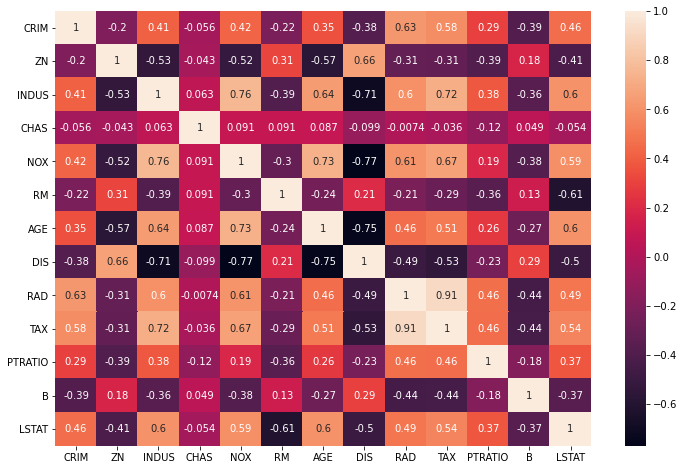

In [22]:
#analysing the correlation between variables
plt.figure(figsize=(12,8))
sns.heatmap(df_housing[df_housing.columns[0:-1]].corr(), annot=True)
plt.show()

In [109]:
reg_model = LinearRegression() #default fit_intercept=True
reg_model.fit(X_train2, y_train2)
reg_preds = reg_model.predict(X_test2)
reg_mae = mean_absolute_error(y_test2, reg_preds)
reg_mse = mean_squared_error(y_test2, reg_preds)

In [110]:
print("OLS model mean absolute error: ", reg_mae)
print("OLS model mean squared error: ", reg_mse)

OLS model mean absolute error:  3.8135375493477475
OLS model mean squared error:  24.690111264121054


#### Regression random forest

In [111]:
ref_forest_model = RandomForestRegressor()
ref_forest_model.fit(X_train2,y_train2)
reg_forest_preds = ref_forest_model.predict(X_test2)
reg_forest_mae = mean_absolute_error(y_test2, reg_forest_preds)
reg_forest_mse = mean_squared_error(y_test2, reg_forest_preds)

In [112]:
print("Regression Random Forest mean absolute error: ", reg_forest_mae)
print("Regression Random Forest mean squared error: ", reg_forest_mse)

Regression Random Forest mean absolute error:  1.991470588235295
Regression Random Forest mean squared error:  6.513472372549021


### Baseline results for Wisconsin data

#### SVM 

At first, we remove missing values for 'Bare_Nuclei'.

In [29]:
X_train1_no_miss = X_train1[np.where(~np.isnan(X_train1[:,6]))]
y_train1_no_miss = y_train1[np.where(~np.isnan(X_train1[:,6]))]
X_test1_no_miss = X_test1[np.where(~np.isnan(X_test1[:,6]))]
y_test1_no_miss = y_test1[np.where(~np.isnan(X_test1[:,6]))]

In [235]:
print("Shape of train data before and after removal of missing values: ", X_train1.shape, X_train1_no_miss.shape)

Shape of train data before and after removal of missing values:  (559, 10) (546, 10)


In [31]:
print('Percentage of missing values in the Bare_Nuclei variable: ', 100*(X_train1.shape[0]- X_train1_no_miss.shape[0])/X_train1.shape[0])

Percentage of missing values in the Bare_Nuclei variable:  2.3255813953488373


In [32]:
svm_model = SVC()
svm_model.fit(X_train1_no_miss[:,1:], y_train1_no_miss)
svm_preds = svm_model.predict(X_test1_no_miss[:,1:])
svm_acc = accuracy_score(y_test1_no_miss, svm_preds)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.9635036496350365


#### Random forest classifier

In [33]:
clf_forest_model = RandomForestClassifier()
clf_forest_model.fit(X_train1_no_miss[:,1:], y_train1_no_miss)
clf_forest_preds = clf_forest_model.predict(X_test1_no_miss[:,1:])
clf_forest_acc = accuracy_score(y_test1_no_miss, clf_forest_preds)
print("Random Forest classifier accuracy:", clf_forest_acc)

Random Forest classifier accuracy: 0.948905109489051


### Introducing missing variables

I have chosen 4 variables for each dataset for which I will introduce missing values. For Wisconsin dataset the variables chosen are categorical variables and for the Boston data the numerical variables

In [34]:
def insert_missing_val(X,cols,perc):
    """
    Function defined for inserting missing values to the selected train set exploratory variables
    Parameters:
        X - array of the train set
        cols - column numbers to which we want to insert missing values
        perc - average percentage of missing values in the columns
    """
    X_missing = X.copy()
    for i in cols:
        obs_nulls = np.random.rand(X.shape[0]) < perc
        X_missing[obs_nulls,i] = np.nan
        
    return X_missing
        

In [35]:
X_train1_miss_20 = insert_missing_val(X_train1, [1,3,6,7], 0.2)
X_train1_miss_10 = insert_missing_val(X_train1, [1,3,6,7], 0.1)
X_train1_miss_5 = insert_missing_val(X_train1, [1,3,6,7], 0.05)
X_train1_miss_1 = insert_missing_val(X_train1, [1,3,6,7], 0.01)

In [36]:
X_train2_miss_20 = insert_missing_val(X_train2, [0,5,6,7], 0.2)
X_train2_miss_10 = insert_missing_val(X_train2, [0,5,6,7], 0.1)
X_train2_miss_5 = insert_missing_val(X_train2, [0,5,6,7], 0.05)
X_train2_miss_1 = insert_missing_val(X_train2, [0,5,6,7], 0.01)

In [37]:
def clf_models(X_train,X_test,y_train,y_test):
    """
    Function which trains and calculates accuracy for the specific classification models on the given datasets 
    """
    #SVM classifier
    svm_model = SVC()
    svm_model.fit(X_train[:,1:], y_train)
    svm_preds = svm_model.predict(X_test[:,1:])
    svm_acc = accuracy_score(y_test, svm_preds)
    #print("SVM accuracy:", svm_acc)
    
    #Random Forest classifier
    clf_forest_model = RandomForestClassifier()
    clf_forest_model.fit(X_train[:,1:], y_train)
    clf_forest_preds = clf_forest_model.predict(X_test[:,1:])
    clf_forest_acc = accuracy_score(y_test, clf_forest_preds)
    #print("Random Forest classifier accuracy:", clf_forest_acc)
    
    return svm_acc, clf_forest_acc

In [38]:
def reg_models(X_train,X_test,y_train,y_test):
    """
    Function which trains and calculates accuracy for the specific regression models on the given datasets 
    """
    #OLS model
    reg_model = LinearRegression() #default fit_intercept=True
    reg_model.fit(X_train, y_train)
    reg_preds = reg_model.predict(X_test)
    reg_mae = mean_absolute_error(y_test, reg_preds)
    reg_mse = mean_squared_error(y_test, reg_preds)
    
    #Random Forest regressor
    ref_forest_model = RandomForestRegressor()
    ref_forest_model.fit(X_train,y_train)
    reg_forest_preds = ref_forest_model.predict(X_test)
    reg_forest_mae = mean_absolute_error(y_test, reg_forest_preds)
    reg_forest_mse = mean_squared_error(y_test, reg_forest_preds)

    return reg_mae, reg_mse, reg_forest_mae, reg_forest_mse

### Investigation of the impact of the miising values in the dataset on the models efficiency

#### Method: delete observations with missing values

In [51]:
def delete_miss_rows(X,y):
    """
    Function which delete rows with the missing values
    """
    df_no_miss = pd.DataFrame(np.c_[X,y]).dropna()
    X_no_miss = df_no_miss[df_no_miss.columns[0:-1]].values
    y_no_miss = df_no_miss[df_no_miss.columns[-1]].values
    
    return X_no_miss, y_no_miss

In [83]:
datasets_clf = [X_train1_miss_1, X_train1_miss_5, X_train1_miss_10, X_train1_miss_20]
datasets_reg = [X_train2_miss_1, X_train2_miss_5, X_train2_miss_10, X_train2_miss_20]

Firstly, we will investigate the impact of the deleting different number of observations in the training set on the classification models' efficiency.

In [84]:
svm_accs = [round(svm_acc,4)]
clf_forest_accs = [round(clf_forest_acc,4)]

for i in datasets_clf:
    X_train_del_miss, y_train_del_miss = delete_miss_rows(i, y_train1)
    svm_accuracy, clf_forest_accuracy = clf_models(X_train_del_miss,X_test1_no_miss,y_train_del_miss,y_test1_no_miss)
    svm_accs.append(round(svm_accuracy,4))
    clf_forest_accs.append(round(clf_forest_accuracy,4))    

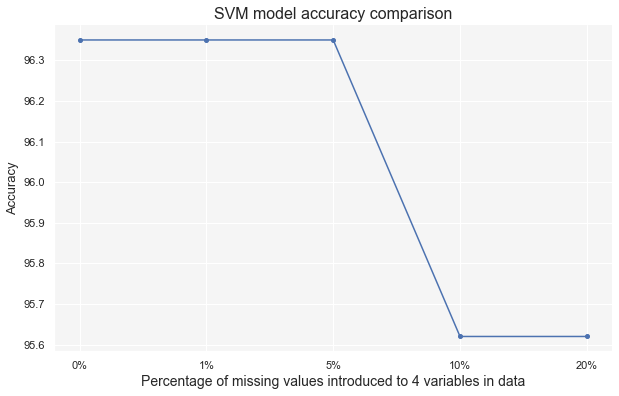

In [85]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                'axes.facecolor':'whitesmoke'}
#sns.color_palette("Blues", as_cmap=True)
sns.set_theme( rc=custom_params)
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(svm_accs)*100, marker='o', markersize=4)
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('Accuracy',fontsize=13)
plt.title('SVM model accuracy comparison', fontsize=16)
plt.show()

We can recognise a slight decrease in the SVM model accuracy for the datasets with 10% and 20% observations in 4 variables set as null.

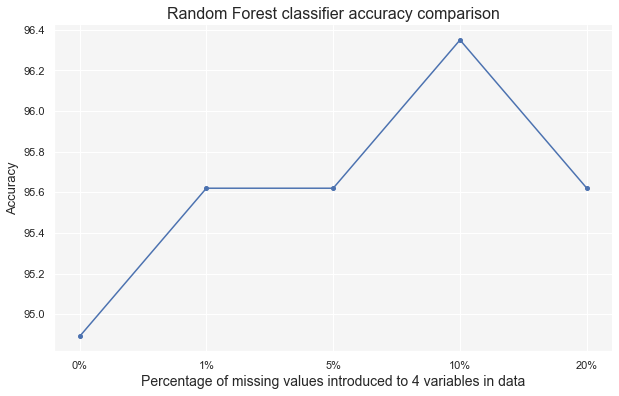

In [86]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(clf_forest_accs)*100, marker='o', markersize=4)
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('Accuracy',fontsize=13)
plt.title('Random Forest classifier accuracy comparison', fontsize=16)
plt.show()

Surprisingly, in most cases, the accuracy of the Random Forest classifier increased after deleting missing observations. It decreased in case of 20% observations in the variable set as nulls. However, the level of accuracy was still higher in comparison to the initial dataset.

Now, we will investigate the results for the regression models.

In [117]:
reg_forest_mae_list = [round(reg_forest_mae,4)]
reg_forest_mse_list = [round(reg_forest_mse,4)]
reg_mae_list = [round(reg_mae,4)]
reg_mse_list = [round(reg_mse,4)]


for i in datasets_reg:
    X_train_del_miss, y_train_del_miss = delete_miss_rows(i, y_train2)
    reg_mae_cur, reg_mse_cur, reg_forest_mae_cur, reg_forest_mse_cur = reg_models(X_train_del_miss,X_test2,y_train_del_miss,y_test2)
    reg_forest_mae_list.append(round(reg_forest_mae_cur,4))
    reg_forest_mse_list.append(round(reg_forest_mse_cur,4))
    reg_mae_list.append(round(reg_mae_cur,4))
    reg_mse_list.append(round(reg_mse_cur,4))


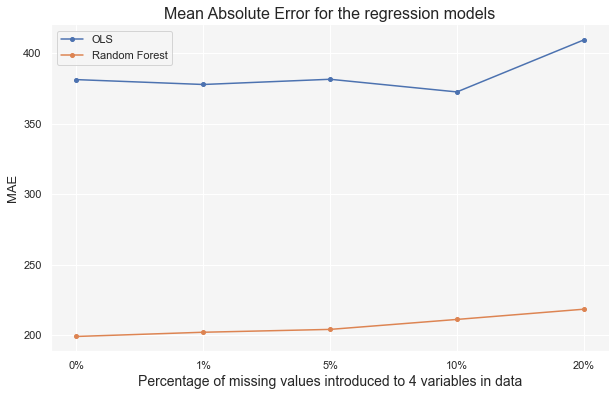

In [118]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_mae_list)*100, marker='o', markersize=4, label='OLS')
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_forest_mae_list)*100, marker='o', markersize=4, label='Random Forest')
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('MAE',fontsize=13)
plt.title('Mean Absolute Error for the regression models', fontsize=16)
plt.legend()
plt.show()

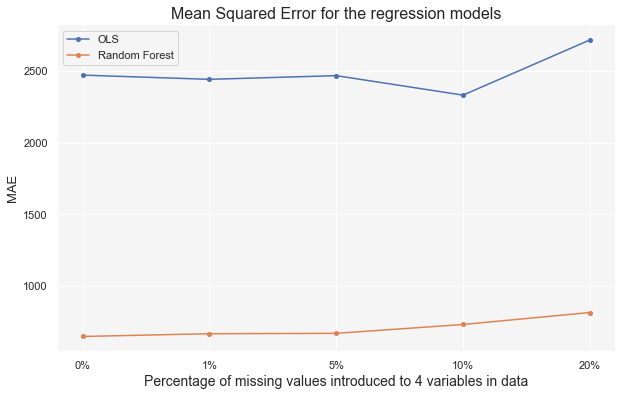

In [119]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_mse_list)*100, marker='o', markersize=4, label='OLS')
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_forest_mse_list)*100, marker='o', markersize=4, label='Random Forest')
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('MAE',fontsize=13)
plt.title('Mean Squared Error for the regression models', fontsize=16)
plt.legend()
plt.show()

In general we can see that both MAE and MSE are much lower for the Random Forest regression. When it comes to the comparison between the training datasets, the values of both coefficients are more stable in Random Forest case, with a slight tendency to increase. On the other hand, for the OLS models we can recognise a significant dercrease in values in case of 10% missing values introduced and then a huge increase for the 20% of missing values introduced.

#### Method: Replace missing values with:
* **the most frequent value for the categorical variables,**
* **the mean value for the numerical variables.**

Replacement with most frequent values for categorical variables (in the Wisconsin dataset).

In [106]:
svm_accs = [round(svm_acc,4)]
clf_forest_accs = [round(clf_forest_acc,4)]

for i in datasets_clf:
    imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    X_train_repl_miss = imp_most_freq.fit_transform(i)
    X_test_repl_miss = imp_most_freq.transform(X_test1)
    svm_accuracy, clf_forest_accuracy = clf_models(X_train_repl_miss,X_test_repl_miss,y_train1,y_test1)
    svm_accs.append(round(svm_accuracy,4))
    clf_forest_accs.append(round(clf_forest_accuracy,4)) 

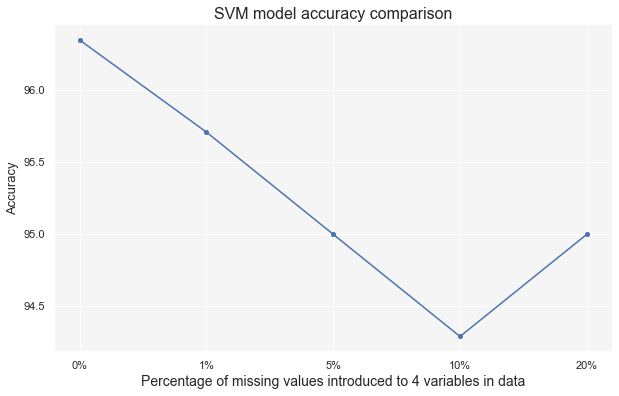

In [107]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                'axes.facecolor':'whitesmoke'}
#sns.color_palette("Blues", as_cmap=True)
sns.set_theme( rc=custom_params)
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(svm_accs)*100, marker='o', markersize=4)
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('Accuracy',fontsize=13)
plt.title('SVM model accuracy comparison', fontsize=16)
plt.show()

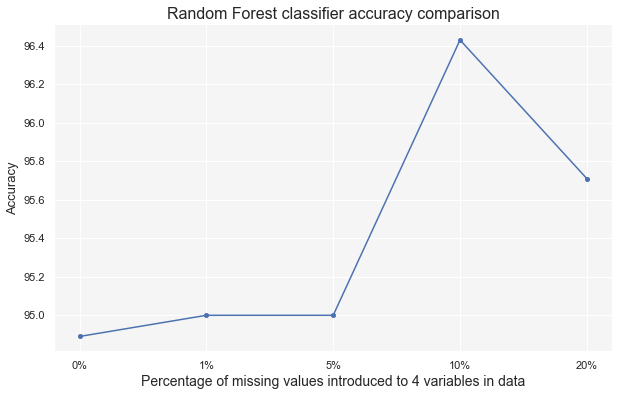

In [108]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(clf_forest_accs)*100, marker='o', markersize=4)
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('Accuracy',fontsize=13)
plt.title('Random Forest classifier accuracy comparison', fontsize=16)
plt.show()

We can see totally different results for each classification model. For SVM there is a tendency to decrease in accuracy while increasing the percentage of missing values. The inverse tendency is recogniseable in case of the Random Forest classifier. The exception in both models is for the 20% missing values introduced. However, it should be underlined that for such high number of missing values could mean that more than half of the observations in the training dataset is disrupted, as from the approach each variable could have missing values at different indices.

Replacement with most mean values for categorical variables (in the Wisconsin dataset).

In [120]:
reg_forest_mae_list = [round(reg_forest_mae,4)]
reg_forest_mse_list = [round(reg_forest_mse,4)]
reg_mae_list = [round(reg_mae,4)]
reg_mse_list = [round(reg_mse,4)]


for i in datasets_reg:
    imp_most_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train_repl_miss = imp_most_freq.fit_transform(i)
    X_test_repl_miss = imp_most_freq.transform(X_test2)    
    reg_mae_cur, reg_mse_cur, reg_forest_mae_cur, reg_forest_mse_cur = reg_models(X_train_repl_miss,X_test_repl_miss,y_train2,y_test2)
    reg_forest_mae_list.append(round(reg_forest_mae_cur,4))
    reg_forest_mse_list.append(round(reg_forest_mse_cur,4))
    reg_mae_list.append(round(reg_mae_cur,4))
    reg_mse_list.append(round(reg_mse_cur,4))


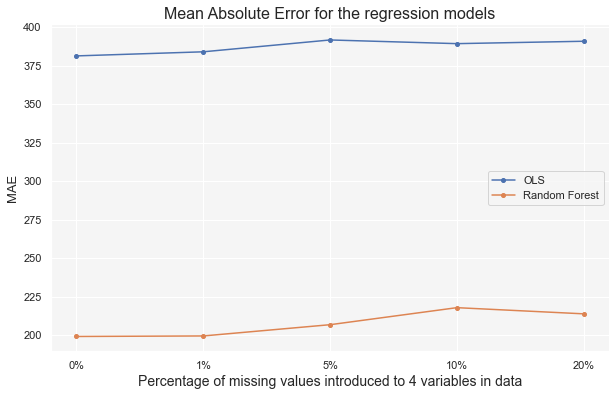

In [123]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_mae_list)*100, marker='o', markersize=4, label='OLS')
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_forest_mae_list)*100, marker='o', markersize=4, label='Random Forest')
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('MAE',fontsize=13)
plt.title('Mean Absolute Error for the regression models', fontsize=16)
plt.legend()
plt.show()

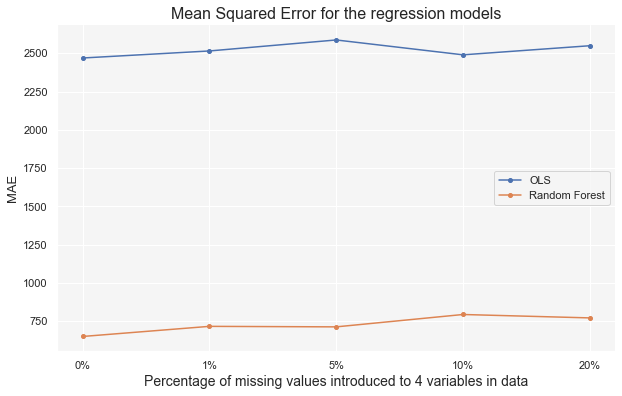

In [124]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_mse_list)*100, marker='o', markersize=4, label='OLS')
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_forest_mse_list)*100, marker='o', markersize=4, label='Random Forest')
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('MAE',fontsize=13)
plt.title('Mean Squared Error for the regression models', fontsize=16)
plt.legend()
plt.show()

In this case, there is gradually increasing tendency for MAE (with the exception of 20% missing values) - especially for Random Forest regression. There is no such tendency in case of OLS model, as the error function values change in both directions.

#### Method: Replace missing values with K-nearest neighbours imputation

1. Classification problems:

In [126]:
svm_accs = [round(svm_acc,4)]
clf_forest_accs = [round(clf_forest_acc,4)]

for i in datasets_clf:
    imp_knn = KNNImputer(n_neighbors=3)
    X_train_knn_miss = imp_knn.fit_transform(i)
    X_test_knn_miss = imp_knn.transform(X_test1)
    svm_accuracy, clf_forest_accuracy = clf_models(X_train_knn_miss,X_test_knn_miss,y_train1,y_test1)
    svm_accs.append(round(svm_accuracy,4))
    clf_forest_accs.append(round(clf_forest_accuracy,4)) 

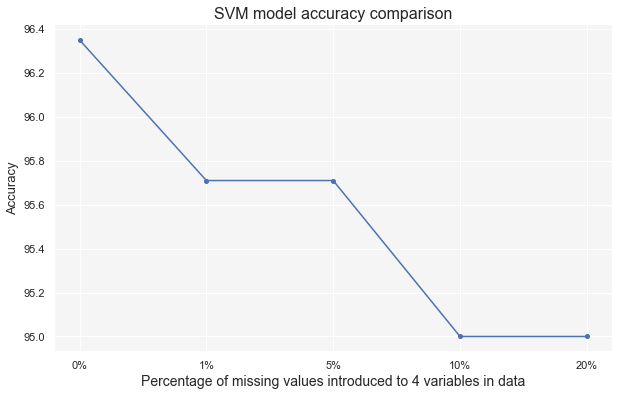

In [127]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(svm_accs)*100, marker='o', markersize=4)
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('Accuracy',fontsize=13)
plt.title('SVM model accuracy comparison', fontsize=16)
plt.show()

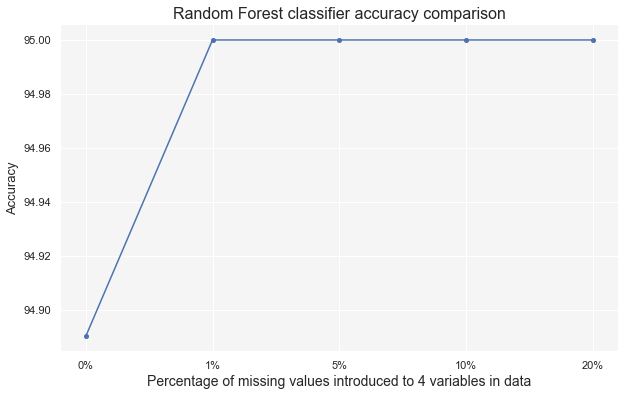

In [128]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(clf_forest_accs)*100, marker='o', markersize=4)
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('Accuracy',fontsize=13)
plt.title('Random Forest classifier accuracy comparison', fontsize=16)
plt.show()

For such imputation, we can see the general decrease in case of SVM model and the reverse tendency for the Random Forest classifier. However the change in the latter one does not seem to be significant.

2. Regression problems:

In [129]:
reg_forest_mae_list = [round(reg_forest_mae,4)]
reg_forest_mse_list = [round(reg_forest_mse,4)]
reg_mae_list = [round(reg_mae,4)]
reg_mse_list = [round(reg_mse,4)]


for i in datasets_reg:
    imp_knn = KNNImputer(n_neighbors=3)
    X_train_knn_miss = imp_knn.fit_transform(i)
    X_test_knn_miss = imp_knn.transform(X_test2)   
    reg_mae_cur, reg_mse_cur, reg_forest_mae_cur, reg_forest_mse_cur = reg_models(X_train_knn_miss,X_test_knn_miss,y_train2,y_test2)
    reg_forest_mae_list.append(round(reg_forest_mae_cur,4))
    reg_forest_mse_list.append(round(reg_forest_mse_cur,4))
    reg_mae_list.append(round(reg_mae_cur,4))
    reg_mse_list.append(round(reg_mse_cur,4))


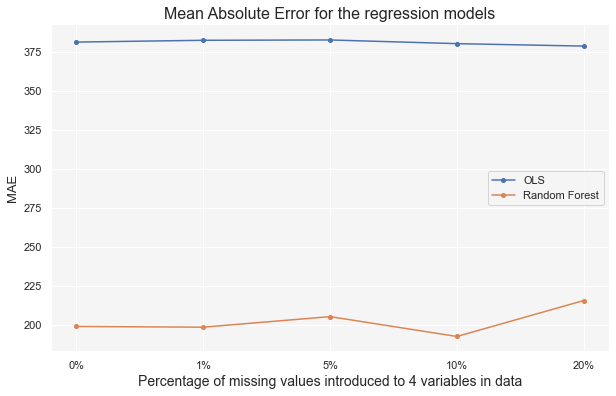

In [130]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_mae_list)*100, marker='o', markersize=4, label='OLS')
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_forest_mae_list)*100, marker='o', markersize=4, label='Random Forest')
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('MAE',fontsize=13)
plt.title('Mean Absolute Error for the regression models', fontsize=16)
plt.legend()
plt.show()

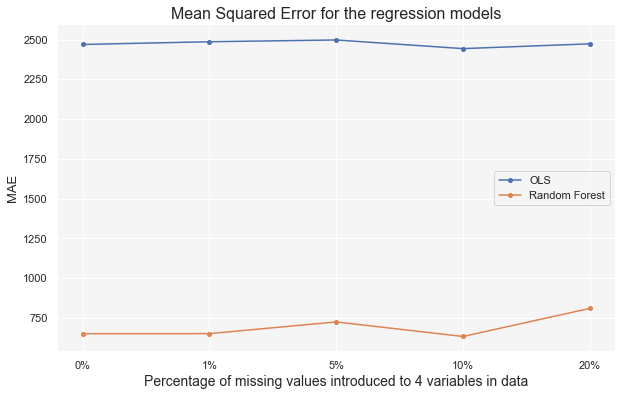

In [131]:
plt.figure(figsize=(10,6))
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_mse_list)*100, marker='o', markersize=4, label='OLS')
plt.plot(['0%','1%','5%','10%','20%'], np.array(reg_forest_mse_list)*100, marker='o', markersize=4, label='Random Forest')
plt.xlabel('Percentage of missing values introduced to 4 variables in data', fontsize=14)
plt.ylabel('MAE',fontsize=13)
plt.title('Mean Squared Error for the regression models', fontsize=16)
plt.legend()
plt.show()

The changes are not significant in case of the regression models. The lines are similiar in both error functions.

Note: after repeating the above steps, the majority of the results were similiar, The discrepancies of the results could be caused by the randomness of selecting indices with missing values or the division the oryginal data into train and test datasets.

## Exercise 2.2

We load datasets directly from github and then, using sklearn classes and methods we define models for detecting outliers. 

In [155]:
dataset_names = ['aggregation.data.gz', 'compound.data.gz', 'd31.data.gz', 'flame.data.gz', 'pathbased.data.gz', 
                 'a3.data.gz', 's4.data.gz', 'unbalance.data.gz']

In [230]:
datasets_dict = dict()
path = 'https://github.com/gagolews/clustering-data-v1/raw/master/sipu/'

for i in dataset_names:
    #print(path+i)
    datasets_dict[i] = pd.read_csv(path+i, 
                                   compression="gzip", sep=' ', header=None)

In [160]:
print("Example dataset 'aggregation.data.gz': \n", datasets_dict['aggregation.data.gz'])

Example dataset 'aggregation.data.gz': 
          0      1
0    15.55  28.65
1    14.90  27.55
2    14.45  28.35
3    14.15  28.80
4    13.75  28.05
..     ...    ...
783   7.80   3.35
784   8.05   2.75
785   8.50   3.25
786   8.10   3.55
787   8.15   4.00

[788 rows x 2 columns]


In [167]:
def model_outliers(X):
    """
    Function returning the predicted outliers with the application of 3 different methods:
    One-class SVM, Local Outlier Factor and Isolation Forest Model
    """
    # One-class SVM
    svm_out = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05) #default values
    svm_out.fit(X)
    svm_preds = svm_out.predict(X) #predicting outliers

    # Local Outlier Factor model
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05) #the most common n_neighbors value
    lof.fit(X)
    lof_preds = lof.fit_predict(X) #predicting outliers 

    # Isolation Forest model
    iforest = IsolationForest(n_estimators=100, contamination=0.05)
    iforest.fit(X)
    iforest_preds = iforest.predict(X) #predicting outliers
    
    return svm_preds, lof_preds, iforest_preds

In [168]:
svm_preds1, lof_preds1, iforest_preds1 = model_outliers(datasets_dict['aggregation.data.gz'])

In [229]:
#datasets_dict

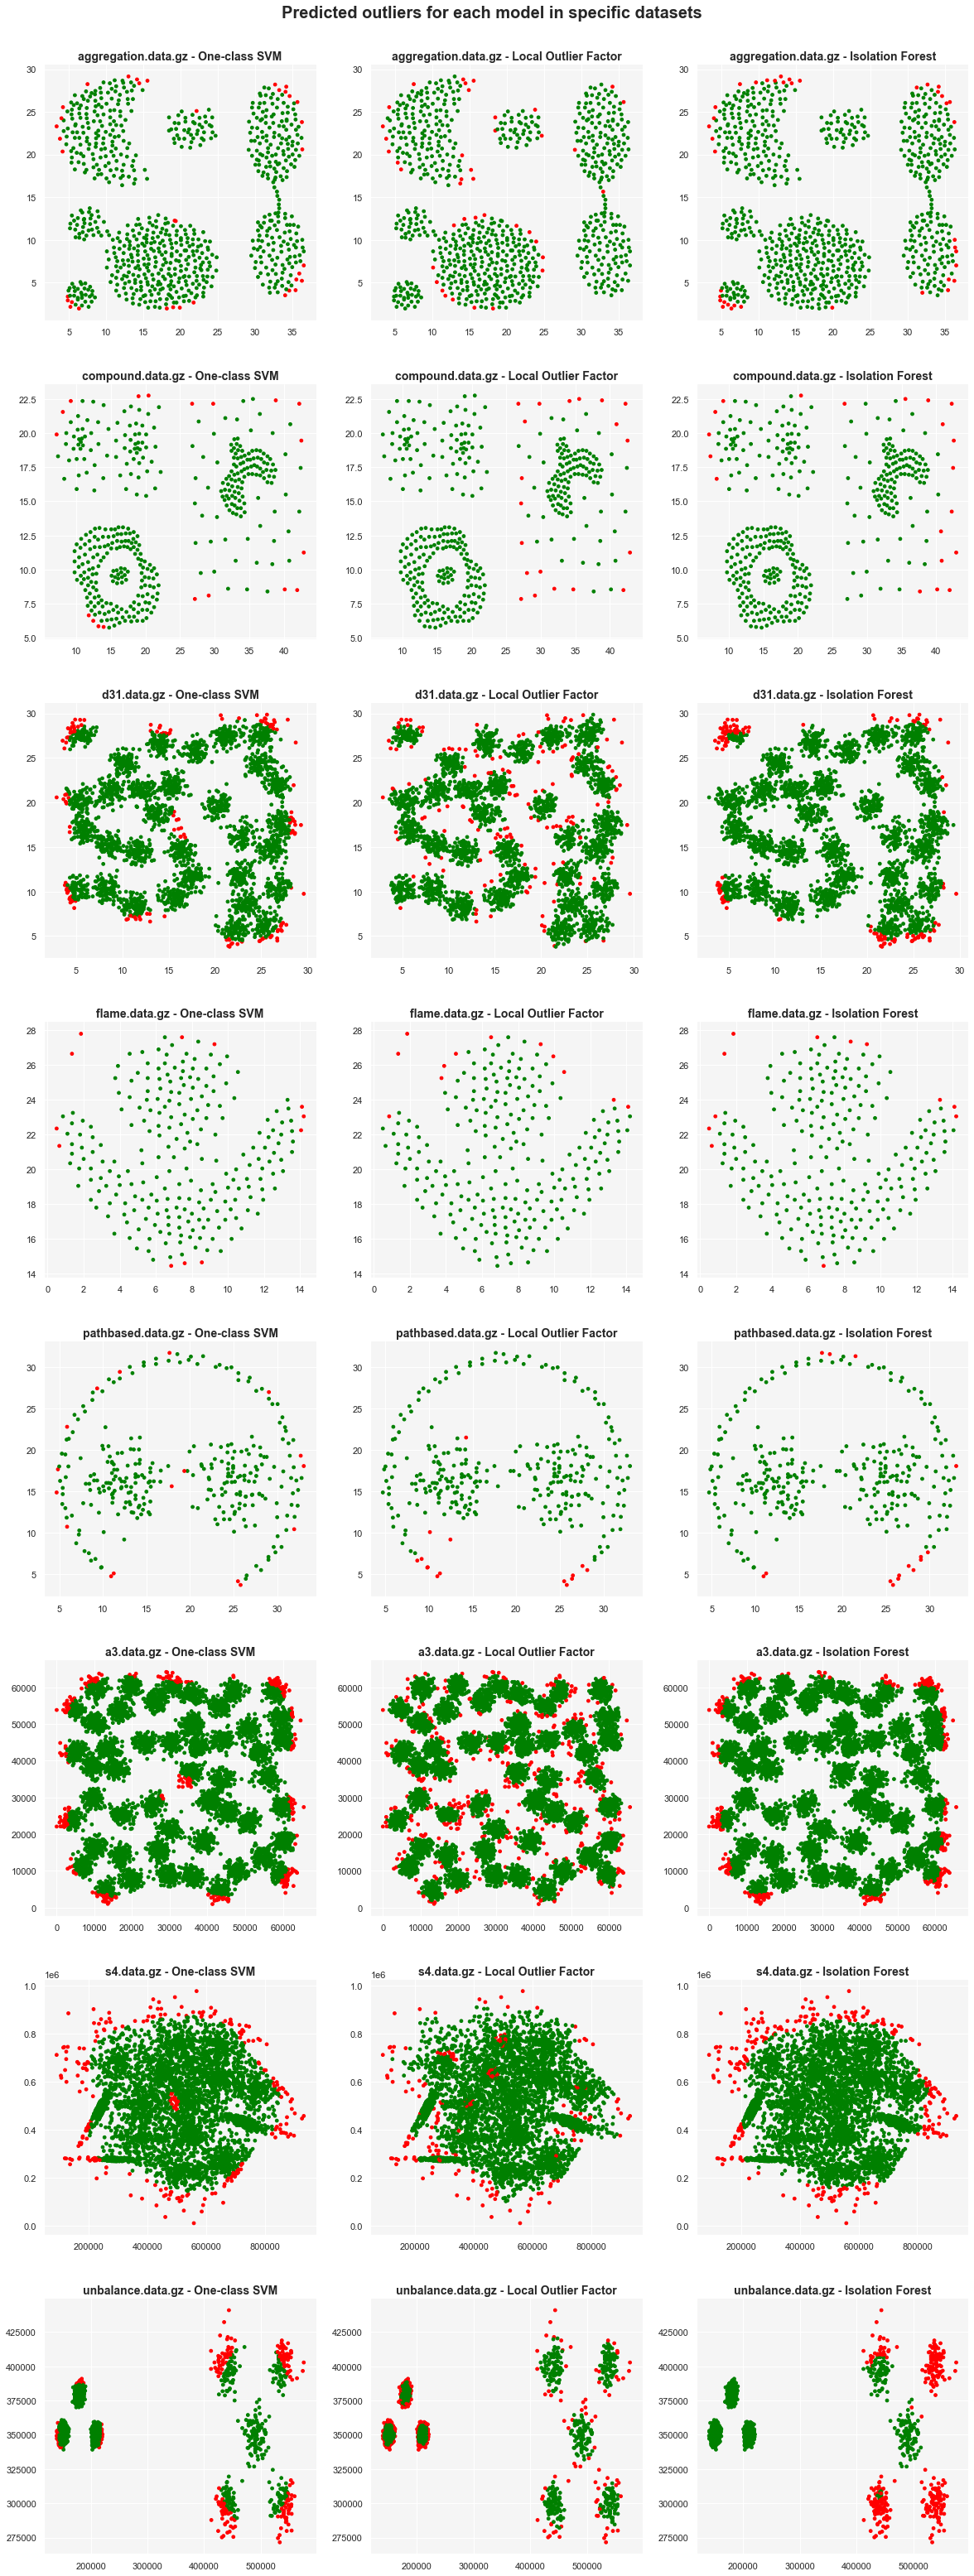

In [236]:
fig, axs = plt.subplots(len(datasets_dict), 3, figsize=(20,50))

for i,key in enumerate(datasets_dict):
    svm_preds_out, lof_preds_out, iforest_preds_out = model_outliers(datasets_dict[key])
    
    axs[i,0].scatter(datasets_dict[key][0], datasets_dict[key][1],
                        c = pd.DataFrame(svm_preds_out).replace({1:'green',-1:'red'}).values.reshape((-1,)), s=14)
    axs[i,0].set_title(key + ' - One-class SVM', fontsize=14, fontweight='bold')
    axs[i,1].scatter(datasets_dict[key][0], datasets_dict[key][1],
                        c = pd.DataFrame(lof_preds_out).replace({1:'green',-1:'red'}).values.reshape((-1,)), s=14)
    axs[i,1].set_title(key + ' - Local Outlier Factor', fontsize=14, fontweight='bold')
    axs[i,2].scatter(datasets_dict[key][0], datasets_dict[key][1],
                        c = pd.DataFrame(iforest_preds_out).replace({1:'green',-1:'red'}).values.reshape((-1,)), s=14)
    axs[i,2].set_title(key + ' - Isolation Forest', fontsize=14, fontweight='bold')
    
fig.suptitle("Predicted outliers for each model in specific datasets", fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.96, hspace=0.25, wspace=0.2)
#fig.show()

We can see that depending on applied model, the number and localisation of detected outliers are different.